# Robust Regression
- Many regression algorithms are linear in that they assume that the relationship between the input variable or variables and the target variable is linear,
- Linear regression assumes that distribution is normal/gaussian
- Regression model which are not affected by outliers. These are the regression algorithms when we have dataset with outliers. 
- - robust regression that is aware of the possibility of outliers in a dataset and assigns them less weight than other examples in the dataset.

## Huber Regression

- The “epsilon” argument controls what is considered an outlier, where smaller values consider more of the data outliers, and in turn, make the model more robust to outliers.
- This uses the Huber loss in the optimization routine. 
- Default epsilon  = 1.35, defines a threshold (based on the distance between target and prediction) that makes the loss function switch from a squared error to an absolute one
- Repeated K fold
- Cross validation 
- The Huber loss identifies outliers by considering the residuals, denoted by z. 
- If the observation is considered to be regular (because the absolute value of the residual is smaller than some threshold \epsilon), then apply the squared loss function. Otherwise, the observation is considered to be an outlier and you apply the absolute loss. Having said that, Huber loss is basically a combination of the squared and absolute loss functions.


In [5]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [6]:
rng = np.random.RandomState(0)

X, y, coef = make_regression(
    n_samples=200, n_features=2, noise=4.0, 
    coef=True, random_state=0
)

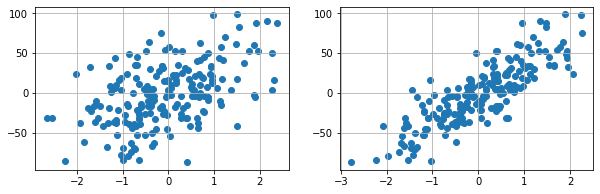

In [7]:
fix, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(X[:,0],y)
ax[0].grid(True)
ax[1].scatter(X[:,1],y)
ax[1].grid(True)
plt.show()

In [8]:
#Inserting outliers
X[:4] = rng.uniform(10, 20, (4, 2))
y[:4] = rng.uniform(100, 200, 4)

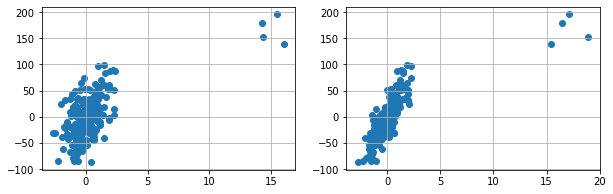

In [9]:
fix, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].scatter(X[:,0],y)
ax[0].grid(True)
ax[1].scatter(X[:,1],y)
ax[1].grid(True)
plt.show()

In [12]:
# Huber Regressor
huber = HuberRegressor()


In [13]:
huber.fit(X,y)

HuberRegressor()

array([[16.02763376, 15.44883183]])

array([763.50484115])

# Huber Regression

In [1]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 

In [16]:
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
 # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
    if random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()
    return X, y
 

In [17]:
# evaluate a model
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return absolute(scores)

In [18]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 pyplot.scatter(X, y)
 # plot the line of best fit
 xaxis = arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 pyplot.plot(xaxis, yaxis, color='r')
 # show the plot
 pyplot.title(type(model).__name__)
 pyplot.show()

Mean MAE: 2.374 (0.849)


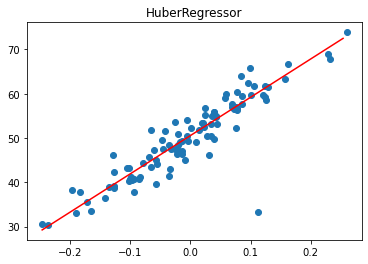

In [19]:
# load dataset
X, y = get_dataset()
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

## RANSAC Regression: Random Sample Consensus
- RANSAC tries to separate data into outliers and inliers and fits the model on the inliers.
- evaluates RANSAC regression on the regression dataset with outliers, first evaluating the model with repeated cross-validation and then plotting the line of best fit
- tries to separate the training data into inliers (which may be subject to noise) and outliers.

### Steps:
1. Select a random subset from the initial data set.
2. Fit a model to the selected random subset. By default, that model is a linear regression model; however, you can change it to other regression models.
3. Use the estimated model to calculate the residuals for all the data points in the initial data set
4. All observations with absolute residuals smaller than or equal to the selected threshold are considered inliers and create the so-called consensus set.
5. The fitted model is saved as the best one if sufficiently many points have been classified as part of the consensus set. 
6. These steps are performed iteratively. 

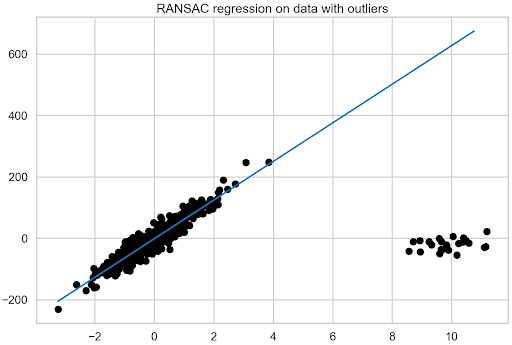

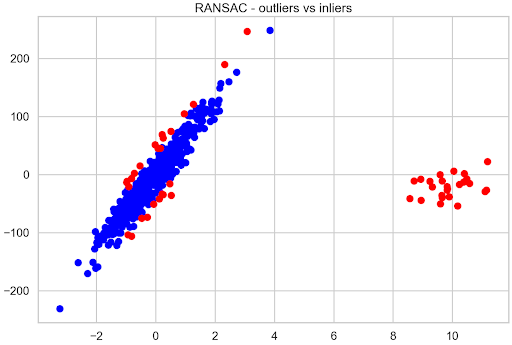

In [26]:
from sklearn.linear_model import RANSACRegressor

In [22]:
# data prep
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
 # add some artificial outliers
    seed(1)
    for i in range(10):
         factor = randint(2, 4)
    if random() > 0.5:
         X[i] += factor * X.std()
    else:
         X[i] -= factor * X.std()
    return X, y

In [23]:
#model evaluation
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return absolute(scores)

In [24]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 pyplot.scatter(X, y)
 # plot the line of best fit
 xaxis = arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 pyplot.plot(xaxis, yaxis, color='r')
 # show the plot
 pyplot.title(type(model).__name__)
 pyplot.show()

Mean MAE: 2.400 (0.831)


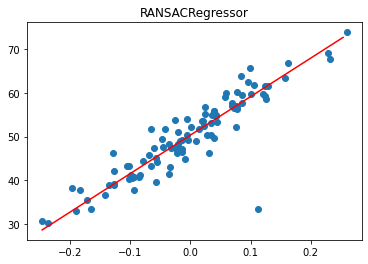

In [27]:
# load dataset
X, y = get_dataset()
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

In [ ]:
2. 

## Theil Sen Regression
- Theil Sen regression involves fitting multiple regression models on subsets of the training data and combining the coefficients together in the end.
- first evaluating the model with repeated cross-validation and then plotting the line of best fit.
- it makes no assumption about the underlying data distribution. In short, it involves fitting multiple regression models on subsets of the training data and then aggregating the coefficients at the last step.

### Steps
1. Use the algorithm only for small problems in terms of the number of samples and features.
2. Tune the n_subsamples hyperparameter. A lower value leads to higher robustness to outliers at the cost of lower efficiency, while a higher value leads to lower robustness and higher efficiency.
3. Use the max_subpopulation hyperparameter. If the total value of n_samples choose n_subsamples is larger than max_subpopulation

In [28]:
from sklearn.linear_model import TheilSenRegressor

In [29]:
def get_dataset():
    X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
 # add some artificial outliers
    seed(1)
    for i in range(10):
        factor = randint(2, 4)
    if random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()
    return X, y

In [30]:
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return absolute(scores)
 

In [31]:
#BFT
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 pyplot.scatter(X, y)
 # plot the line of best fit
 xaxis = arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 pyplot.plot(xaxis, yaxis, color='r')
 # show the plot
 pyplot.title(type(model).__name__)
 pyplot.show()

Mean MAE: 2.371 (0.850)


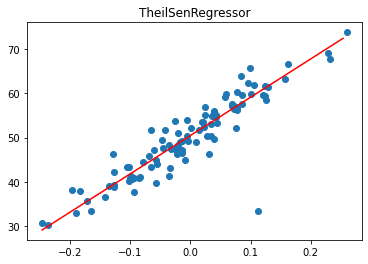

In [32]:
X, y = get_dataset()
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)